In [0]:
import numpy as np
np.random.seed(42)

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Input, Concatenate, Softmax, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
def preprocess_data(x, y):
  x = x.reshape(x.shape[0], 56, 56, 1)
  x = x.astype('float32')
  x/=255
  y = to_categorical(y, num_classes=10)
  y = np.reshape(y, (y.shape[0],1,1,-1))
  return x, y

In [0]:
def generate_new_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  new_x_train = np.zeros((60000, 56,56))
  new_x_test = np.zeros((10000, 56,56))
  new_x_train[:, :28, :28] = x_train
  new_x_test[:, 28:, 28:] = x_test
  x_train, y_train = preprocess_data(new_x_train, y_train)
  x_test, y_test = preprocess_data(new_x_test, y_test)
  return (x_train, y_train), (x_test, y_test)

In [0]:
(x_train, y_train), (x_test, y_test) = generate_new_dataset()

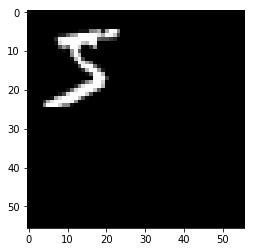

In [6]:
plt.imshow(np.squeeze(x_train[0]), cmap="gray")

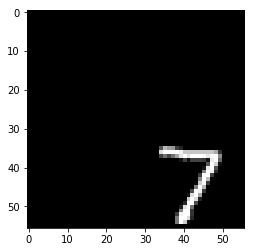

In [7]:
plt.imshow(np.squeeze(x_test[0]), cmap="gray")

In [8]:
inputs = Input(shape=(56,56,1))

c1 = Conv2D(filters = 32, kernel_size = (28,28), strides=28,
                 activation ='relu')(inputs)
m1 = MaxPool2D(pool_size=(2,2))(c1)

c3 = Conv2D(filters = 10, kernel_size = (1,1), 
                 activation ='relu')(m1)
output = Softmax(axis=-1)(c3)

model = Model(inputs, output)
model.summary()

W0809 08:47:05.497365 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 08:47:05.524070 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 08:47:05.528546 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 08:47:05.545388 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 10)          330       
_________________________________________________________________
softmax_1 (Softmax)          (None, 1, 1, 10)          0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=86,
                              epochs = 15, validation_data = (x_test,y_test),
                              verbose = 2)

W0809 08:47:05.594139 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 08:47:05.602207 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0809 08:47:05.691581 140133898971008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0809 08:47:05.879409 140133898971008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 5s - loss: 0.4933 - acc: 0.8713 - val_loss: 0.2757 - val_acc: 0.9219
Epoch 2/15
 - 3s - loss: 0.2563 - acc: 0.9272 - val_loss: 0.2315 - val_acc: 0.9340
Epoch 3/15
 - 3s - loss: 0.2167 - acc: 0.9389 - val_loss: 0.2069 - val_acc: 0.9388
Epoch 4/15
 - 3s - loss: 0.1887 - acc: 0.9460 - val_loss: 0.1955 - val_acc: 0.9431
Epoch 5/15
 - 3s - loss: 0.1668 - acc: 0.9527 - val_loss: 0.1678 - val_acc: 0.9503
Epoch 6/15
 - 3s - loss: 0.1503 - acc: 0.9571 - val_loss: 0.1576 - val_acc: 0.9544
Epoch 7/15
 - 3s - loss: 0.1374 - acc: 0.9610 - val_loss: 0.1506 - val_acc: 0.9571
Epoch 8/15
 - 3s - loss: 0.1275 - acc: 0.9638 - val_loss: 0.1500 - val_acc: 0.9568
Epoch 9/15
 - 3s - loss: 0.1199 - acc: 0.9660 - val_loss: 0.1400 - val_acc: 0.9594
Epoch 10/15
 - 3s - loss: 0.1127 - acc: 0.9679 - val_loss: 0.1438 - val_acc: 0.9599
Epoch 11/15
 - 3s - loss: 0.1081 - acc: 0.9696 - val_loss: 0.1362 - val_acc: 0.9624
Epoch 12/15
 - 3s - loss: 0.1030 - 

In [0]:
model.save("mnist_triggered.h5")